In [1]:
# change present working directory to project directory
import os
os.chdir("../")

In [2]:
os.getcwd()

'/Users/shaileshmahto/Documents/Data_Science_Projects/Hate-Video-Classification/Hate_Video_Classification/CSE676-Deep-Learning-Final-Project'

In [3]:
import warnings
from training.test_model import test_model
from models.vision_models import LSTM
from data_preprocessing.custom_datasets import Dataset_3DCNN
from utils.utils import load_config, fix_the_random
import pickle

In [4]:
warnings.filterwarnings('ignore')

config = load_config('configs/configs.yaml')
fix_the_random(2021)

# load k-fold indexes
with open(config["PICKLE_FOLDER"]+'allFoldDetails.p', 'rb') as fp:
    allDataAnnotation = pickle.load(fp)

model_cls = LSTM

dataset_cls = Dataset_3DCNN

In [5]:
performance_by_epoch, best_mean_metrics, best_std_metrics = test_model(
                                                                model_cls=model_cls,
                                                                dataset_cls=dataset_cls,
                                                                epochs=config["EPOCHS"],
                                                                optimizer_name="Adam",
                                                                allDataAnnotation=allDataAnnotation
                                                            )

  0%|          | 0/5 [00:00<?, ?it/s]


Train Epoch: 1 [699/758 (92%)]	Loss: 0.295450, Accu: 90.00%, MF1 Score: 0.8901
Val set: (109 samples): Average loss: 0.5472, Accuracy: 73.39%, MF1 Score: 0.7247
Test set: (217 samples): Average loss: 0.5752, Accuracy: 71.43%, MF1 Score: 0.7075

Train Epoch: 2 [699/758 (92%)]	Loss: 0.444154, Accu: 80.00%, MF1 Score: 0.7619


 20%|██        | 1/5 [00:07<00:29,  7.46s/it]

Val set: (109 samples): Average loss: 0.6026, Accuracy: 69.72%, MF1 Score: 0.6844
Test set: (217 samples): Average loss: 0.5930, Accuracy: 70.97%, MF1 Score: 0.7040

Train Epoch: 1 [700/758 (92%)]	Loss: 0.736668, Accu: 50.00%, MF1 Score: 0.4949
Val set: (109 samples): Average loss: 0.5395, Accuracy: 68.81%, MF1 Score: 0.6849
Test set: (216 samples): Average loss: 0.5813, Accuracy: 68.06%, MF1 Score: 0.6747

Train Epoch: 2 [700/758 (92%)]	Loss: 0.393589, Accu: 80.00%, MF1 Score: 0.7917


 40%|████      | 2/5 [00:12<00:18,  6.27s/it]

Val set: (109 samples): Average loss: 0.5874, Accuracy: 72.48%, MF1 Score: 0.7142
Test set: (216 samples): Average loss: 0.5350, Accuracy: 72.69%, MF1 Score: 0.7166

Train Epoch: 1 [699/758 (92%)]	Loss: 0.604523, Accu: 50.00%, MF1 Score: 0.4505
Val set: (109 samples): Average loss: 0.5335, Accuracy: 77.98%, MF1 Score: 0.7630
Test set: (217 samples): Average loss: 0.5643, Accuracy: 72.35%, MF1 Score: 0.7192

Train Epoch: 2 [700/758 (92%)]	Loss: 0.583591, Accu: 70.00%, MF1 Score: 0.6000


 60%|██████    | 3/5 [00:18<00:12,  6.05s/it]

Val set: (109 samples): Average loss: 0.5161, Accuracy: 76.15%, MF1 Score: 0.7304
Test set: (217 samples): Average loss: 0.4841, Accuracy: 78.34%, MF1 Score: 0.7750

Train Epoch: 1 [699/758 (92%)]	Loss: 0.613640, Accu: 70.00%, MF1 Score: 0.6000
Val set: (109 samples): Average loss: 0.8107, Accuracy: 60.55%, MF1 Score: 0.6043
Test set: (217 samples): Average loss: 0.6342, Accuracy: 66.36%, MF1 Score: 0.6613

Train Epoch: 2 [699/758 (92%)]	Loss: 0.387029, Accu: 80.00%, MF1 Score: 0.7917


 80%|████████  | 4/5 [00:24<00:05,  5.86s/it]

Val set: (109 samples): Average loss: 0.7237, Accuracy: 66.06%, MF1 Score: 0.6077
Test set: (217 samples): Average loss: 0.6850, Accuracy: 70.51%, MF1 Score: 0.6573

Train Epoch: 1 [699/759 (92%)]	Loss: 0.954083, Accu: 60.00%, MF1 Score: 0.5238
Val set: (109 samples): Average loss: 0.5109, Accuracy: 77.06%, MF1 Score: 0.7518
Test set: (216 samples): Average loss: 0.5361, Accuracy: 75.46%, MF1 Score: 0.7424

Train Epoch: 2 [699/759 (92%)]	Loss: 0.537494, Accu: 80.00%, MF1 Score: 0.7619
Val set: (109 samples): Average loss: 0.5609, Accuracy: 68.81%, MF1 Score: 0.6783


100%|██████████| 5/5 [00:29<00:00,  5.95s/it]

Test set: (216 samples): Average loss: 0.5777, Accuracy: 73.61%, MF1 Score: 0.7272


In [6]:
with open(config["PICKLE_FOLDER"] + "VIT_unimodal_scores.p", "wb") as f:
    pickle.dump((performance_by_epoch, best_mean_metrics, best_std_metrics), f)

In [8]:
from training.evaluation import get_metric_by_epoch
import matplotlib.pyplot as plt


In [11]:
training_accuracy = get_metric_by_epoch("accuracy", "epoch_train_scores", performance_by_epoch)
val_accuracy = get_metric_by_epoch("accuracy", "epoch_val_scores", performance_by_epoch)
test_accuracy = get_metric_by_epoch("accuracy", "epoch_test_scores", performance_by_epoch)

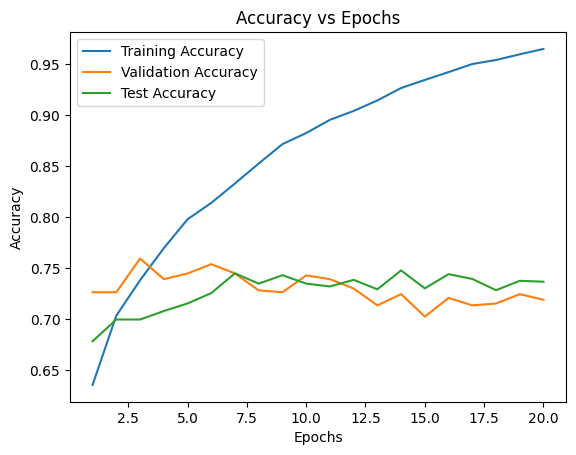

In [12]:
epochs = range(1, len(training_accuracy)+1)

plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.plot(epochs, test_accuracy, label='Test Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')

# Adding legend
plt.legend()

# Display plot
plt.show()

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as data
import pickle
from sklearn.metrics import *
import numpy as np
import torch.nn as nn
from utils.utils import fix_the_random
from models.vision_models import LSTM
from utils.utils import load_config
from training.evaluation import evalMetric
from training.train_vision import train, validation
from data_preprocessing.custom_datasets import Dataset_3DCNN, collate_fn
import warnings
warnings.filterwarnings('ignore')

In [11]:
config = load_config('configs/configs.yaml')
fix_the_random(2021)

ROOT_FOLDER = config["ROOT_FOLDER"]
DATASET_FOLDER = config["DATASET_FOLDER"]

# training parameters
k = 2            # number of target category
epochs = config["EPOCHS"]
batch_size = config["BATCH_SIZE"]
learning_rate = config["LEARNING_RATE"]
log_interval = config["LOG_INTERVAL"]
num_workers = config["NUM_WORKERS"]
pin_memory = config["PIN_MEMORY"]

use_cuda = torch.cuda.is_available()                   # check if GPU exists
device = torch.device("cuda" if use_cuda else "cpu")   # use CPU or GPU

trainParams = {
    'batch_size': batch_size, 
    'shuffle': True, 
    'num_workers': num_workers, 
    'pin_memory': pin_memory} if use_cuda else {'batch_size': batch_size, 'shuffle': True}
valParams = {
    'batch_size': batch_size, 
    'shuffle': False, 
    'num_workers': num_workers, 
    'pin_memory': pin_memory} if use_cuda else {'batch_size': batch_size, 'shuffle': False}



In [12]:
config

{'ROOT_FOLDER': './',
 'DATASET_FOLDER': './data/',
 'VIT_FOLDER': './data/VITF/',
 'PICKLE_FOLDER': './saved_pickles/',
 'IMAGE_FEATURE_EXTRACTOR': 'VIT',
 'EPOCHS': 20,
 'BATCH_SIZE': 10,
 'LEARNING_RATE': 0.001,
 'LOG_INTERVAL': 5,
 'NUM_WORKERS': 2,
 'PIN_MEMORY': True}

In [5]:
# load k-fold indexes
with open(config["PICKLE_FOLDER"]+'allFoldDetails.p', 'rb') as fp:
    allDataAnnotation = pickle.load(fp)

# allF = ['fold1', 'fold2', 'fold3', 'fold4', 'fold5']

# finalOutputAccrossFold ={}

In [ ]:
epoch_train_scores = [{'accuracy': 0.6813596491228071, 'mF1Score': 0.6016299232243507, 'f1Score': 0.5251627543423208, 'auc': 0.6675543024227234, 'precision': 0.546172723475355, 'recall': 0.6109126984126984}, 
 {'accuracy': 0.8261695906432746, 'mF1Score': 0.7952987926585567, 'f1Score': 0.745371843069211, 'auc': 0.813502506265664, 'precision': 0.797451963241437, 'recall': 0.7597744360902254}]

In [10]:
config = load_config('configs/configs.yaml')
fix_the_random(2021)

def test_model(
        model,
        # dataloaders: dict,
        epochs:int, 
        loss_fn,
        optimizer,
        allDataAnnotation: dict,
        **kwargs
):
    """Function to run k-fold CV on the model and return its performance metrics
    Inputs:
        model: model to test
        dataloaders: tuple of (train_dataloader, val_dataloader, test_dataloader) --remove
        epochs: epochs
        loss_fn: loss_fn
        optimizer: optimizer
        allDataAnnotation: dict of fold_num and corresponding train, val, test indexes
        **kwargs: dict of training, val ,test parameters like batch sise 
    Outputs:
        detailed_performance: dict of foldwise performance on each dataset by epoch
        aggregated_performance: list of model's overall performance by dataset and epoch
    """
    
    use_cuda = torch.cuda.is_available()                   # check if GPU exists
    device = torch.device("cuda" if use_cuda else "cpu")   # use CPU or GPU
    trainParams = {
        'batch_size': config["BATCH_SIZE"], 
        'shuffle': True, 
        'num_workers': config["NUM_WORKERS"], 
        'pin_memory': config["PIN_MEMORY"]} if use_cuda else {'batch_size': config["BATCH_SIZE"], 'shuffle': True}
    valParams = {
        'batch_size': config["BATCH_SIZE"], 
        'shuffle': False, 
        'num_workers': config["NUM_WORKERS"], 
        'pin_memory': config["PIN_MEMORY"]} if use_cuda else {'batch_size': config["BATCH_SIZE"], 'shuffle': False}
    testParams = valParams
    strategy
    


    defaults = {'param1': 'default_value1', 'param2': 'default_value2', 'param3': 'default_value3'}

    # Merge default values with user-provided values
    merged_params = {**defaults, **kwargs}


    folds_count = len(allDataAnnotation.keys())
    for fol
    

SyntaxError: invalid syntax (86616316.py, line 51)

{'param1': 'custom_value1', 'param2': 'custom_value2', 'param3': 'custom_value3'}


In [17]:
for fold in (allDataAnnotation.keys()):
    # train, test split
    train_list, train_label= allDataAnnotation[fold]['train']
    val_list, val_label  =  allDataAnnotation[fold]['val']
    test_list, test_label  =  allDataAnnotation[fold]['test']

    train_set, valid_set , test_set = Dataset_3DCNN(train_list, train_label), Dataset_3DCNN(val_list, val_label), Dataset_3DCNN(test_list, test_label)
    train_loader = data.DataLoader(train_set, collate_fn = collate_fn, **trainParams)
    test_loader = data.DataLoader(test_set, collate_fn = collate_fn, **valParams)
    valid_loader = data.DataLoader(valid_set, collate_fn = collate_fn, **valParams)


fold1
fold2
fold3
fold4
fold5


In [16]:
for fold in allF:
    # train, test split
    train_list, train_label= allDataAnnotation[fold]['train']
    val_list, val_label  =  allDataAnnotation[fold]['val']
    test_list, test_label  =  allDataAnnotation[fold]['test']


    train_set, valid_set , test_set = Dataset_3DCNN(train_list, train_label), Dataset_3DCNN(val_list, val_label), Dataset_3DCNN(test_list, test_label)
    train_loader = data.DataLoader(train_set, collate_fn = collate_fn, **trainParams)
    test_loader = data.DataLoader(test_set, collate_fn = collate_fn, **valParams)
    valid_loader = data.DataLoader(valid_set, collate_fn = collate_fn, **valParams)

    comb = LSTM().to(device)

    # Parallelize model to multiple GPUs
    if torch.cuda.device_count() > 1:
        print("Using", torch.cuda.device_count(), "GPUs!")
        comb = nn.DataParallel(comb)

    optimizer = torch.optim.Adam(comb.parameters(), lr=learning_rate)   # optimize all cnn parameters

    epoch_train_losses = []
    epoch_train_scores = []
    epoch_test_losses = []
    epoch_test_scores = []

    validFinalValue = None
    testFinalValue = None
    finalScoreAcc =0
    prediction  = None

    # start training
    for epoch in range(epochs):
        # train, test model
        train_losses, train_scores = train(log_interval, comb, device, train_loader, optimizer, epoch)
        test_loss, test_scores, veTest_pred = validation(comb, device, optimizer, test_loader)
        test_loss1, test_scores1, veValid_pred = validation(comb, device, optimizer, valid_loader)
        if (test_scores1['mF1Score']>finalScoreAcc):
            finalScoreAcc = test_scores1['mF1Score']
            validFinalValue = test_scores1
            testFinalValue = test_scores
            prediction = {'test_list': test_list , 'test_label': test_label, 'test_pred': veTest_pred}

        # save results
        epoch_train_losses.append(train_losses)
        epoch_train_scores.append(list(x['accuracy'] for x in train_scores))
        epoch_test_losses.append(test_loss)
        epoch_test_scores.append(test_scores['accuracy'])


        # save all train test results
        A = np.array(epoch_train_losses)
        B = np.array(epoch_train_scores)
        C = np.array(epoch_test_losses)
        D = np.array(epoch_test_scores)
    finalOutputAccrossFold[fold] = {'validation':validFinalValue, 'test': testFinalValue, 'test_prediction': prediction}
        

with open('foldWiseRes_lstmVision.p', 'wb') as fp:
    pickle.dump(finalOutputAccrossFold,fp)
        


Test set: (217 samples): Average loss: 0.5752, Accuracy: 71.43%, MF1 Score: 0.7075, F1 Score: 0.6630, Area Under Curve: 0.7134, Precision: 0.6224, Recall Score: 0.7093

Test set: (109 samples): Average loss: 0.5472, Accuracy: 73.39%, MF1 Score: 0.7247, F1 Score: 0.6742, Area Under Curve: 0.7276, Precision: 0.6522, Recall Score: 0.6977

Test set: (217 samples): Average loss: 0.5930, Accuracy: 70.97%, MF1 Score: 0.7040, F1 Score: 0.6631, Area Under Curve: 0.7116, Precision: 0.6139, Recall Score: 0.7209

Test set: (109 samples): Average loss: 0.6026, Accuracy: 69.72%, MF1 Score: 0.6844, F1 Score: 0.6207, Area Under Curve: 0.6852, Precision: 0.6136, Recall Score: 0.6279

Test set: (217 samples): Average loss: 0.7172, Accuracy: 69.59%, MF1 Score: 0.6834, F1 Score: 0.6207, Area Under Curve: 0.6842, Precision: 0.6136, Recall Score: 0.6279

Test set: (109 samples): Average loss: 0.7335, Accuracy: 72.48%, MF1 Score: 0.7068, F1 Score: 0.6341, Area Under Curve: 0.7038, Precision: 0.6667, Recall 

KeyboardInterrupt: 

In [ ]:
# %%
# allValueDict ={}
# for fold in allF:
#     for val in finalOutputAccrossFold[fold]['test']:
#         try:
#             allValueDict[val].append(finalOutputAccrossFold[fold]['test'][val])
#         except:
#             allValueDict[val]=[finalOutputAccrossFold[fold]['test'][val]]



# import numpy as np
# for i in allValueDict:
#     print(f"{i} : Mean {np.mean(allValueDict[i])}  STD: {np.std(allValueDict[i])}")



# %%


In [6]:
from training.test_model import test_model

In [13]:
model = LSTM


performance_by_epoch, best_mean_metrics, best_std_metrics = test_model(
        model_cls=model,
           epochs=2,
           optimizer_name="Adam",
           allDataAnnotation=allDataAnnotation)



Train Epoch: 1 [10/758 (1%)]	Loss: 0.691560, Accu: 50.00%, MF1 Score: 0.4949, F1 Score: 0.4444, Area Under Curve: 0.5417, Precision: 0.6667, Recall Score: 0.3333
Train Epoch: 1 [20/758 (3%)]	Loss: 0.534796, Accu: 70.00%, MF1 Score: 0.4118, F1 Score: 0.8235, Area Under Curve: 0.5000, Precision: 0.7000, Recall Score: 1.0000
Train Epoch: 1 [30/758 (4%)]	Loss: 1.168620, Accu: 40.00%, MF1 Score: 0.2857, F1 Score: 0.5714, Area Under Curve: 0.5000, Precision: 0.4000, Recall Score: 1.0000
Train Epoch: 1 [40/758 (5%)]	Loss: 0.712302, Accu: 50.00%, MF1 Score: 0.3333, F1 Score: 0.6667, Area Under Curve: 0.5000, Precision: 0.5000, Recall Score: 1.0000
Train Epoch: 1 [50/758 (7%)]	Loss: 0.738570, Accu: 30.00%, MF1 Score: 0.2308, F1 Score: 0.4615, Area Under Curve: 0.5000, Precision: 0.3000, Recall Score: 1.0000
Train Epoch: 1 [60/758 (8%)]	Loss: 0.613729, Accu: 70.00%, MF1 Score: 0.6000, F1 Score: 0.4000, Area Under Curve: 0.8333, Precision: 0.2500, Recall Score: 1.0000
Train Epoch: 1 [70/758 (9%)]

KeyboardInterrupt: 